<a href="https://colab.research.google.com/github/Sphad7/IAHOMEWORK/blob/main/Tarea_2_src/Robotica_Tarea_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tarea N°2: Aprendiendo a detectar líneas y eliminar distorsión**

### Importar librerias

In [ ]:
import cv2 as cv
import math
import glob
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv_imshow

### Cargar las imagenes

In [ ]:
!wget raw.githubusercontent.com/Sphad7/Robotica-Tareas/main/Tarea_2_src/p1/imagen01.jpg
!wget raw.githubusercontent.com/Sphad7/Robotica-Tareas/main/Tarea_2_src/p1/imagen02.jpg
!wget raw.githubusercontent.com/Sphad7/Robotica-Tareas/main/Tarea_2_src/p1/imagen03.jpg
!wget raw.githubusercontent.com/Sphad7/Robotica-Tareas/main/Tarea_2_src/p1/imagen04.jpg
!wget raw.githubusercontent.com/Sphad7/Robotica-Tareas/main/Tarea_2_src/p1/imagen05.jpg
!wget raw.githubusercontent.com/Sphad7/Robotica-Tareas/main/Tarea_2_src/p1/imagen06.jpg

!wget raw.githubusercontent.com/Sphad7/Robotica-Tareas/main/Tarea_2_src/p2/image_2.jpg
!wget raw.githubusercontent.com/Sphad7/Robotica-Tareas/main/Tarea_2_src/p2/image_5.jpg
!wget raw.githubusercontent.com/Sphad7/Robotica-Tareas/main/Tarea_2_src/p2/image_6.jpg
!wget raw.githubusercontent.com/Sphad7/Robotica-Tareas/main/Tarea_2_src/p2/image_8.jpg
!wget raw.githubusercontent.com/Sphad7/Robotica-Tareas/main/Tarea_2_src/p2/image_9.jpg
!wget raw.githubusercontent.com/Sphad7/Robotica-Tareas/main/Tarea_2_src/p2/image_10.jpg
!wget raw.githubusercontent.com/Sphad7/Robotica-Tareas/main/Tarea_2_src/p2/image_11.jpg
!wget raw.githubusercontent.com/Sphad7/Robotica-Tareas/main/Tarea_2_src/p2/image_12.jpg
!wget raw.githubusercontent.com/Sphad7/Robotica-Tareas/main/Tarea_2_src/p2/image_14.jpg
!wget raw.githubusercontent.com/Sphad7/Robotica-Tareas/main/Tarea_2_src/p2/image_15.jpg
!wget raw.githubusercontent.com/Sphad7/Robotica-Tareas/main/Tarea_2_src/p2/image_18.jpg
!wget raw.githubusercontent.com/Sphad7/Robotica-Tareas/main/Tarea_2_src/p2/image_19.jpg
!wget raw.githubusercontent.com/Sphad7/Robotica-Tareas/main/Tarea_2_src/p2/image_20.jpg
!wget raw.githubusercontent.com/Sphad7/Robotica-Tareas/main/Tarea_2_src/p2/image_21.jpg
!wget raw.githubusercontent.com/Sphad7/Robotica-Tareas/main/Tarea_2_src/p2/image_22.jpg
!wget raw.githubusercontent.com/Sphad7/Robotica-Tareas/main/Tarea_2_src/p2/image_23.jpg
!wget raw.githubusercontent.com/Sphad7/Robotica-Tareas/main/Tarea_2_src/p2/image_24.jpg
!wget raw.githubusercontent.com/Sphad7/Robotica-Tareas/main/Tarea_2_src/p2/image_25.jpg
!wget raw.githubusercontent.com/Sphad7/Robotica-Tareas/main/Tarea_2_src/p2/image_26.jpg
!wget raw.githubusercontent.com/Sphad7/Robotica-Tareas/main/Tarea_2_src/p2/image_27.jpg
!wget raw.githubusercontent.com/Sphad7/Robotica-Tareas/main/Tarea_2_src/p2/image_29.jpg
!wget raw.githubusercontent.com/Sphad7/Robotica-Tareas/main/Tarea_2_src/p2/image_30.jpg
!wget raw.githubusercontent.com/Sphad7/Robotica-Tareas/main/Tarea_2_src/p2/image_40.jpg
!wget raw.githubusercontent.com/Sphad7/Robotica-Tareas/main/Tarea_2_src/p2/image_41.jpg
!wget raw.githubusercontent.com/Sphad7/Robotica-Tareas/main/Tarea_2_src/p2/image_42.jpg
!wget raw.githubusercontent.com/Sphad7/Robotica-Tareas/main/Tarea_2_src/p2/image_43.jpg
!wget raw.githubusercontent.com/Sphad7/Robotica-Tareas/main/Tarea_2_src/p2/image_44.jpg
!wget raw.githubusercontent.com/Sphad7/Robotica-Tareas/main/Tarea_2_src/p2/image_46.jpg
!wget raw.githubusercontent.com/Sphad7/Robotica-Tareas/main/Tarea_2_src/p2/image_47.jpg
!wget raw.githubusercontent.com/Sphad7/Robotica-Tareas/main/Tarea_2_src/p2/image_48.jpg
!wget raw.githubusercontent.com/Sphad7/Robotica-Tareas/main/Tarea_2_src/p2/image_49.jpg
!wget raw.githubusercontent.com/Sphad7/Robotica-Tareas/main/Tarea_2_src/p2/image_50.jpg
!wget raw.githubusercontent.com/Sphad7/Robotica-Tareas/main/Tarea_2_src/p2/image_57.jpg
!wget raw.githubusercontent.com/Sphad7/Robotica-Tareas/main/Tarea_2_src/p2/image_62.jpg
!wget raw.githubusercontent.com/Sphad7/Robotica-Tareas/main/Tarea_2_src/p2/image_64.jpg
!wget raw.githubusercontent.com/Sphad7/Robotica-Tareas/main/Tarea_2_src/p2/image_65.jpg
!wget raw.githubusercontent.com/Sphad7/Robotica-Tareas/main/Tarea_2_src/p2/image_70.jpg
!wget raw.githubusercontent.com/Sphad7/Robotica-Tareas/main/Tarea_2_src/p2/image_71.jpg
!wget raw.githubusercontent.com/Sphad7/Robotica-Tareas/main/Tarea_2_src/p2/image_72.jpg
!wget raw.githubusercontent.com/Sphad7/Robotica-Tareas/main/Tarea_2_src/p2/image_73.jpg
!wget raw.githubusercontent.com/Sphad7/Robotica-Tareas/main/Tarea_2_src/p2/image_75.jpg

--2024-05-13 22:17:26--  http://raw.githubusercontent.com/Sphad7/Robotica-Tareas/main/Tarea_2_src/p1/imagen01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/Sphad7/Robotica-Tareas/main/Tarea_2_src/p1/imagen01.jpg [following]
--2024-05-13 22:17:26--  https://raw.githubusercontent.com/Sphad7/Robotica-Tareas/main/Tarea_2_src/p1/imagen01.jpg
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 427264 (417K) [image/jpeg]
Saving to: ‘imagen01.jpg’

imagen01.jpg        100%[===================>] 417.25K  --.-KB/s    in 0.04s   

2024-05-13 22:17:26 (11.5 MB/s) - ‘imagen01.jpg’ saved [427264/427264]

URL tran

## **Codigo**

In [ ]:
# Funcion para plotear las imnagenes de forma mas comoda a la vista
def show_images_in_row(images):
    fig = plt.figure(figsize=(15, 5))

    for i, img in enumerate(images):
        ax = fig.add_subplot(1, len(images), i+1)
        ax.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        ax.axis('off')

    plt.show()

In [ ]:
# Convertir a escala de grises y guardar en arreglo
images = [cv.imread('imagen01.jpg', cv.IMREAD_GRAYSCALE), cv.imread('imagen02.jpg', cv.IMREAD_GRAYSCALE), cv.imread('imagen03.jpg', cv.IMREAD_GRAYSCALE),
          cv.imread('imagen04.jpg', cv.IMREAD_GRAYSCALE), cv.imread('imagen05.jpg', cv.IMREAD_GRAYSCALE), cv.imread('imagen06.jpg', cv.IMREAD_GRAYSCALE)]


In [ ]:
def detect_edges(image, umbral_low, pr):
  umbral_high = umbral_low*pr
  image_gauss = cv.GaussianBlur(image,(5,5),1)
  edges = cv.Canny(image_gauss, umbral_low, umbral_high, apertureSize = 3)
  return edges

In [ ]:
def hough(edges, image):
  # Cambio de color
  image_hough = cv.cvtColor(image, cv.COLOR_GRAY2RGB)
  # Deteccion de lineas
  lines = cv.HoughLines(edges, 1, np.pi/180, 140, None)
  if lines is not None:
      for rho, theta in lines[:, 0]:
          a = np.cos(theta)
          b = np.sin(theta)
          x0 = a * rho
          y0 = b * rho
          x1 = int(x0 + 1000 * (-b))
          y1 = int(y0 + 1000 * (a))
          x2 = int(x0 - 1000 * (-b))
          y2 = int(y0 - 1000 * (a))
          cv.line(image_hough, (x1, y1), (x2, y2), (0, 255, 0), 3)
  return image_hough

In [ ]:
def hough_pro(edges, image):
  # Cambio de color
  image_hough_P = cv.cvtColor(image, cv.COLOR_GRAY2RGB)
  # Deteccion de lineas
  linesP = cv.HoughLinesP(edges, 1, np.pi/180, 70, None, 50, 10)
  if linesP is not None:
    for i in range(0, len(linesP)):
      l = linesP[i][0]
      cv.line(image_hough_P, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)
  return image_hough_P

### Standard Hough Line Transform

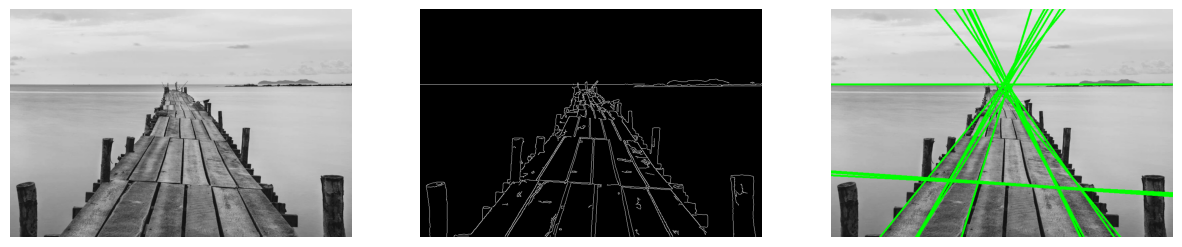

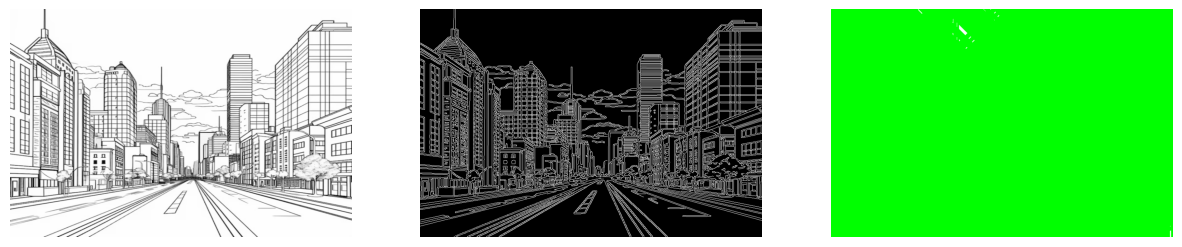

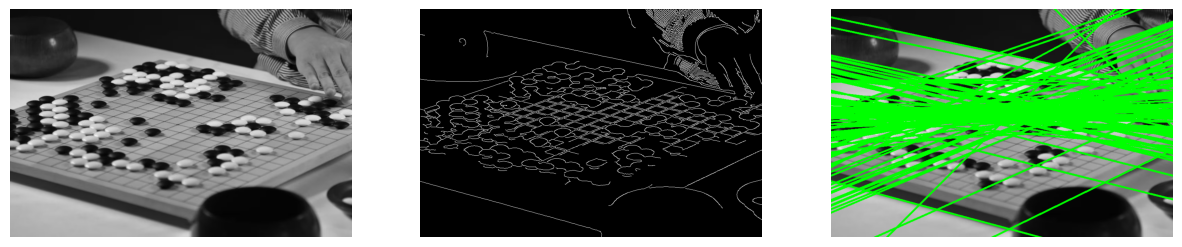

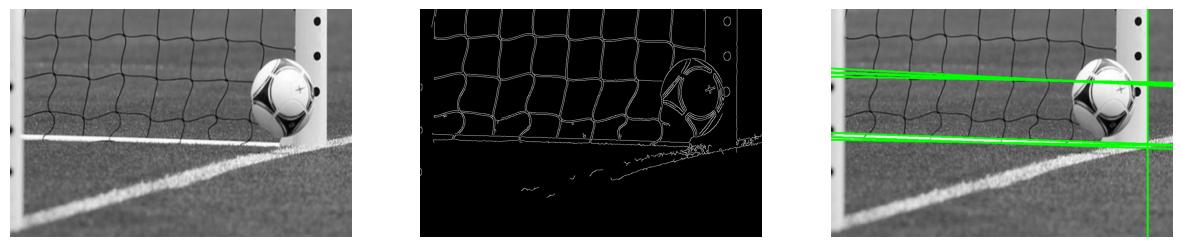

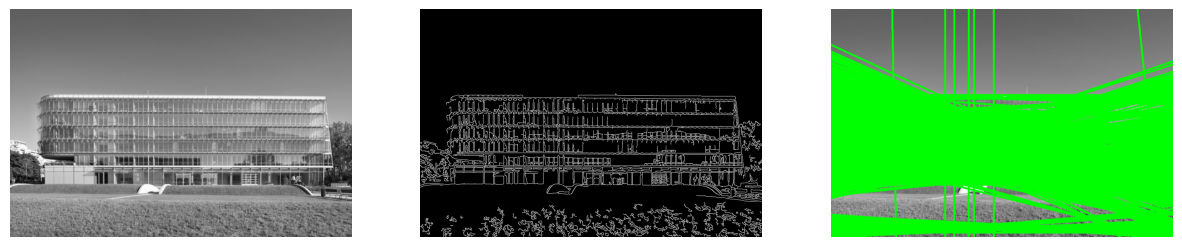

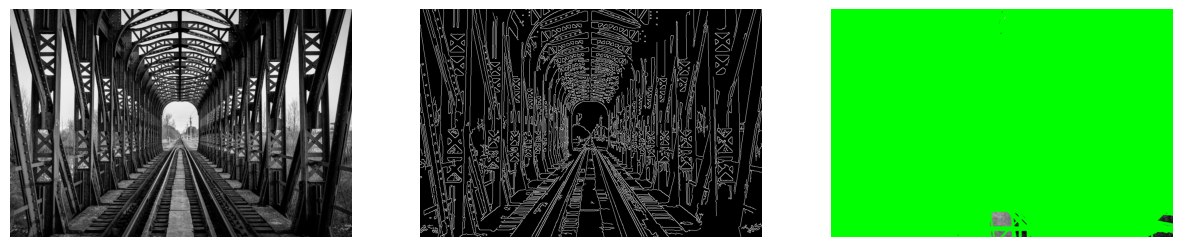

In [ ]:
for image in images:
  imagen = cv.resize(image,(900,600))
  image_copy = imagen.copy()
  image_edges = detect_edges(image_copy, 60, 3)
  image_hough = hough(image_edges, image_copy)

  show_images_in_row([imagen, image_edges, image_hough])

### Probabilistic Hough Line Transform

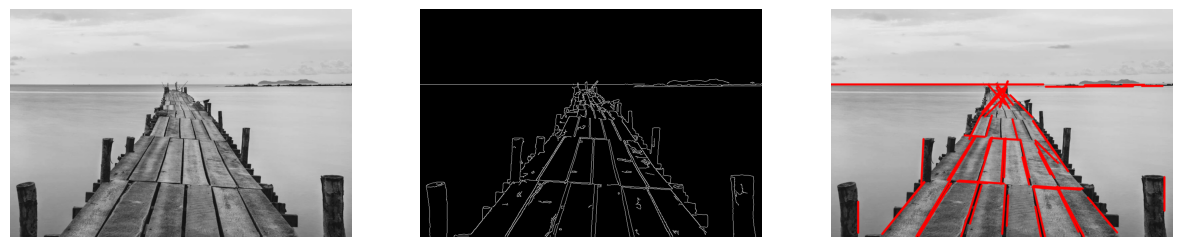

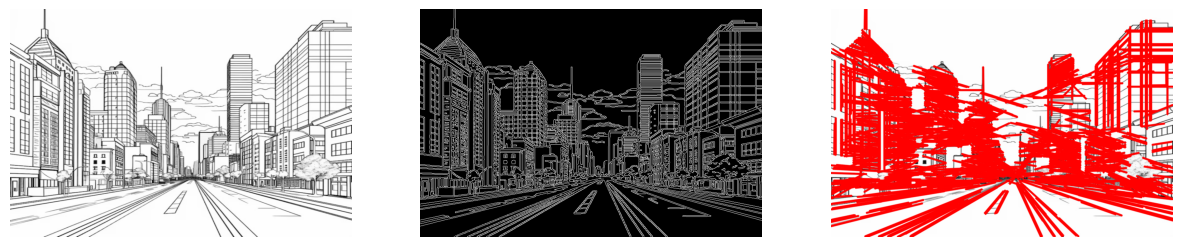

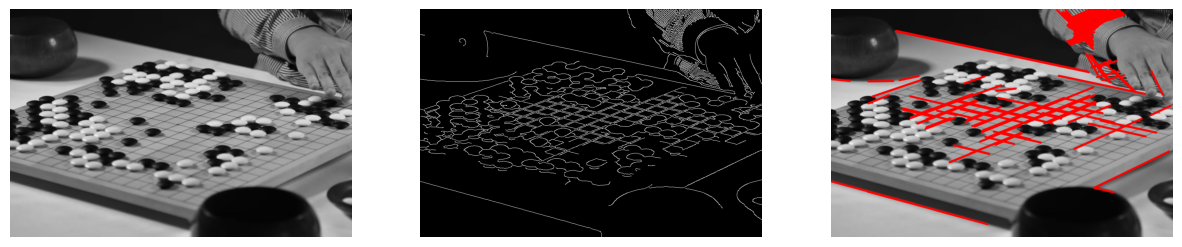

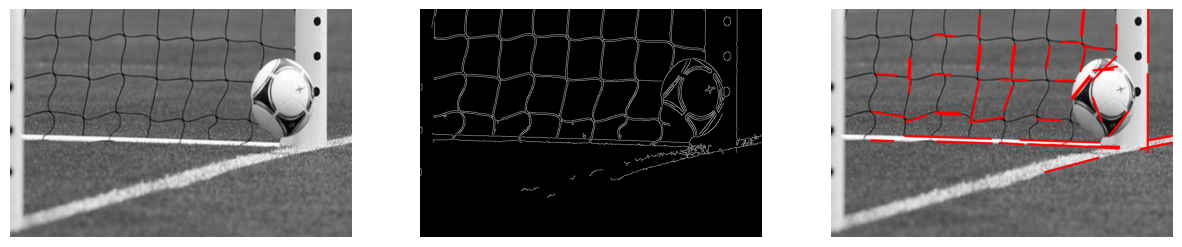

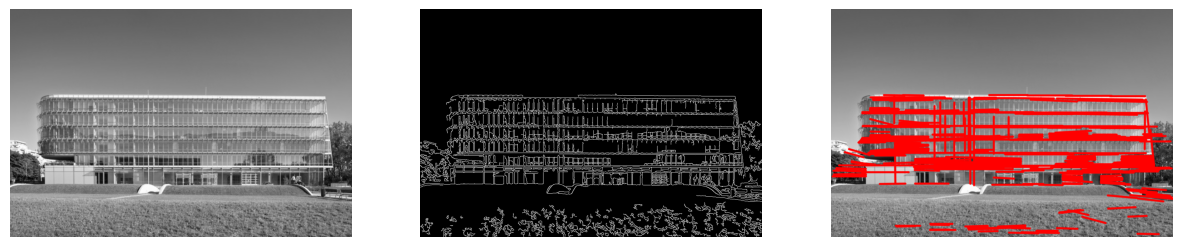

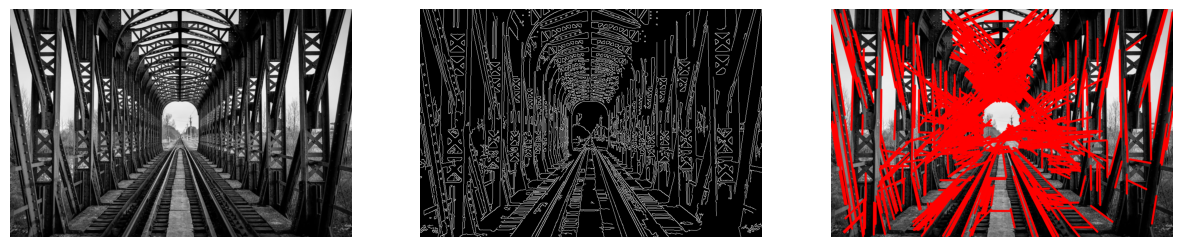

In [ ]:
for image in images:
  imagen = cv.resize(image,(900,600))
  image_copy = imagen.copy()
  image_edges = detect_edges(image_copy, 60, 3)
  image_hough = hough_pro(image_edges, image_copy)

  show_images_in_row([imagen, image_edges, image_hough])

## Parte 2

In [ ]:
def camera_global(image):
  # Tamaño del patrón de ajedrez (número de esquinas interiores)
  pattern_size = (9, 6)
  square_size = 0.025
  # Generar coordenadas de puntos 3D en el mundo real
  object_points = np.zeros((pattern_size[0] * pattern_size[1], 3), np.float32)
  object_points[:, :2] = np.mgrid[0:pattern_size[0], 0:pattern_size[1]].T.reshape(-1, 2) * square_size

  # Arrays para almacenar puntos de esquina 2D y 3D de todas las imagenes
  object_points_list = []
  image_points_list = []

  # Cargar imágenes
  image_files = glob.glob(image)
  for image_file in image_files:
      image = cv.imread(image_file)
      gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
      found, corners = cv.findChessboardCorners(gray, pattern_size, None)

      if found:
          object_points_list.append(object_points)
          image_points_list.append(corners)

  # Calibrar la camara
  ret, camera_matrix, distortion_coeffs, rvecs, tvecs = cv.calibrateCamera(
      object_points_list, image_points_list, gray.shape[::-1], None, None)

  print("Matriz de la camara:\n", camera_matrix)
  print("\nCoefficientes de distorcion:\n", distortion_coeffs)
  print("\nVectores de rotacion:\n", rvecs)
  print("\nVectores de translacion:\n", tvecs)

  # Dibujar patron de ajedrez y ejes coordenados en la imagen
  for i in range(len(image_files)):
      image = cv.imread(image_files[i])
      gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
      found, corners = cv.findChessboardCorners(gray, pattern_size, None)

      if found:
          cv.drawChessboardCorners(image, pattern_size, corners, found)
          image_points = image_points_list[i].reshape(-1, 2)
          rvec = rvecs[i]
          tvec = tvecs[i]
          axis_length = square_size * 3
          axis_points = np.float32([[0,0,0], [axis_length,0,0], [0,axis_length,0], [0,0,-axis_length]]).reshape(-1,3)
          projected_points, _ = cv.projectPoints(axis_points, rvec, tvec, camera_matrix, distortion_coeffs)
          origin = tuple(image_points[0].astype(int))
          cv.drawFrameAxes(image, camera_matrix, distortion_coeffs, rvec, tvec, axis_length)

      cv_imshow(image)

Matriz de la camara:
 [[349.5762551    0.         291.59095076]
 [  0.         344.52275419 258.93352195]
 [  0.           0.           1.        ]]

Coefficientes de distorcion:
 [[ 8.92456602e-02 -1.04176368e-02 -4.25701123e-05 -9.44710427e-05
  -4.91535456e-02]]

Vectores de rotacion:
 (array([[ 0.1381079 ],
       [-0.31619272],
       [-3.0971432 ]]),)

Vectores de translacion:
 (array([[0.14849558],
       [0.08690196],
       [0.19887326]]),)


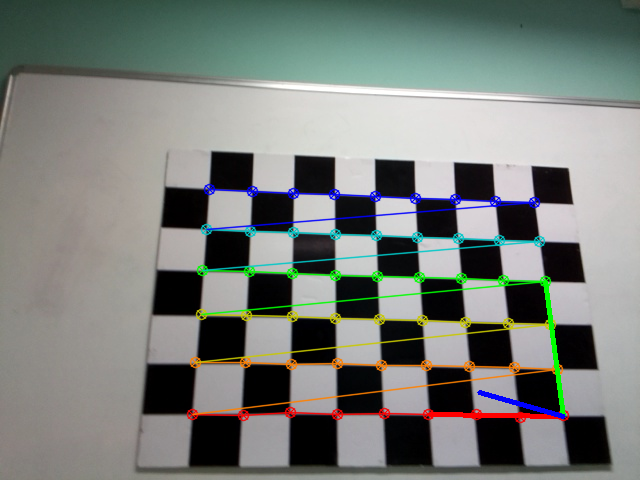

In [ ]:
camera_global("image_10.jpg")

Matriz de la camara:
 [[494.18288318   0.         282.34051024]
 [  0.         483.77266876 221.859731  ]
 [  0.           0.           1.        ]]

Coefficientes de distorcion:
 [[ 0.18535493 -0.12345327 -0.00262768 -0.00699909 -0.19034924]]

Vectores de rotacion:
 (array([[-0.29408681],
       [ 0.17248937],
       [ 3.08837922]]),)

Vectores de translacion:
 (array([[0.16858066],
       [0.07094277],
       [0.32787199]]),)


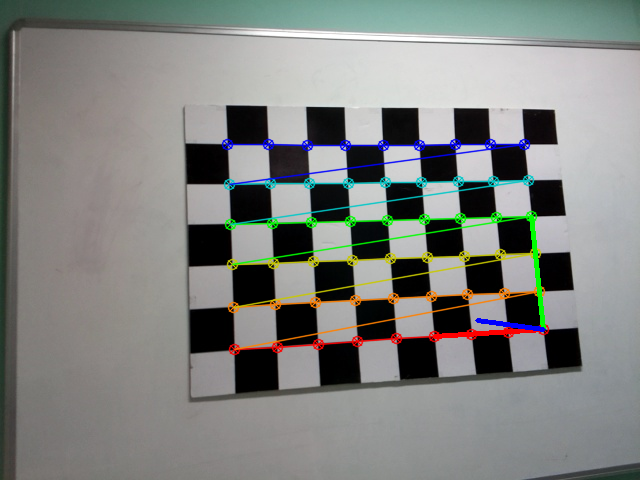

In [ ]:
camera_global("image_2.jpg")

Matriz de la camara:
 [[560.67856902   0.         323.07059919]
 [  0.         529.88910133 230.46351381]
 [  0.           0.           1.        ]]

Coefficientes de distorcion:
 [[ 0.18892232  0.07404544 -0.00228197 -0.00470117 -1.64094649]]

Vectores de rotacion:
 (array([[0.94767199],
       [0.27107831],
       [2.84829785]]),)

Vectores de translacion:
 (array([[0.06439889],
       [0.07716504],
       [0.23364275]]),)


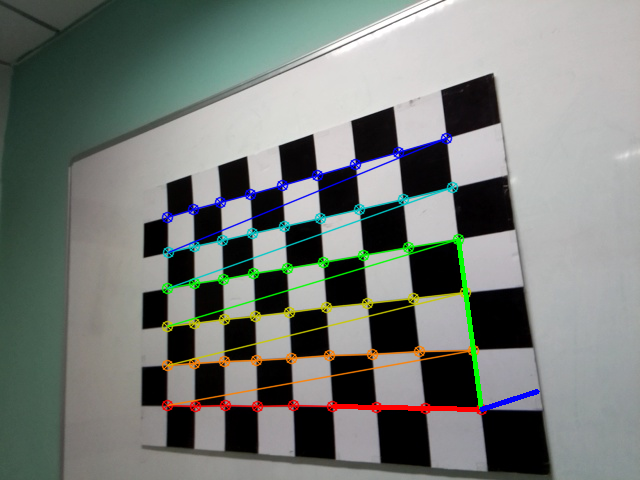

In [ ]:
camera_global("image_11.jpg")

Matriz de la camara:
 [[423.5445346    0.         323.84459639]
 [  0.         423.03582699 248.44912781]
 [  0.           0.           1.        ]]

Coefficientes de distorcion:
 [[ 0.16406822 -0.27246203  0.0030206  -0.00104741  0.06205418]]

Vectores de rotacion:
 (array([[0.06327695],
       [0.04455638],
       [3.1320196 ]]),)

Vectores de translacion:
 (array([[0.10131611],
       [0.06111847],
       [0.19245339]]),)


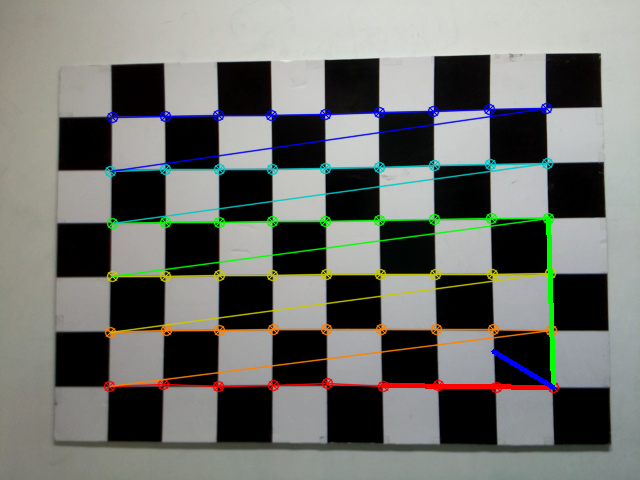

In [ ]:
camera_global("image_47.jpg")

Matriz de la camara:
 [[354.41870131   0.         354.50691049]
 [  0.         361.20722444 287.154736  ]
 [  0.           0.           1.        ]]

Coefficientes de distorcion:
 [[ 0.09114236  0.01228961  0.00926008  0.01047722 -0.08707527]]

Vectores de rotacion:
 (array([[0.4872092 ],
       [0.27324777],
       [2.98393201]]),)

Vectores de translacion:
 (array([[0.03333736],
       [0.04142209],
       [0.13856244]]),)


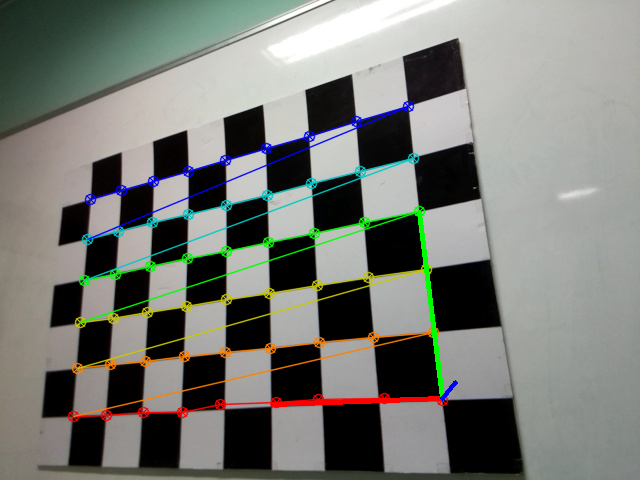

In [ ]:
camera_global("image_24.jpg")